Stock Market Segmentation: Clustering META’s Trading Patterns Using K-Means

Captone 2 by Astha Shandilya



In this capstone 2 project, META's historical sock data is cleaned, prepared, and visualized. META’s historical stock movements are analyzed using K-Means clustering to understand trading behaviors based on daily percentage change, volatility, and trading volume. This segmentation helps understand market trends, detect trading days with high risk, and optimize investment strategies.  META.csv sourced from https://www.kaggle.com/datasets/vainero/google-apple-facebook-stock-price.


Importing & Reading


In [ ]:
# libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("META.csv")



Data Cleaning & preparing


In [ ]:
# Data Cleaning

# Checking missing values
print(df.isnull().sum())

# dropping missing values
df.dropna(inplace=True)

# Removing duplicates
df.drop_duplicates(inplace=True)

# preparing
# convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# set index
df.set_index("Date", inplace=True)

#data overview
print(df.head())



Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-09-07  171.940002  173.309998  170.270004  173.210007  173.210007   
2017-09-08  173.089996  173.490005  170.800003  170.949997  170.949997   
2017-09-11  172.399994  173.889999  172.199997  173.509995  173.509995   
2017-09-12  173.759995  174.000000  171.750000  172.960007  172.960007   
2017-09-13  173.009995  173.169998  172.059998  173.050003  173.050003   

              Volume  
Date                  
2017-09-07  18049500  
2017-09-08  10998500  
2017-09-11  12372000  
2017-09-12  11186300  
2017-09-13   9119300  



Calculating and selecting the attributes


In [ ]:

# calculating 3 factors
df["Daily Change Per"] = df["Close"].pct_change()
df["Moving Average"] = df["Close"].rolling(window=10).mean()
df["Volatility"] = df["Close"].rolling(window=10).std()

df.dropna(inplace=True)

# Selecting attributes
attributes = df[["Daily Change Per", "Volatility", "Moving Average", "Volume"]]

# scale the data
scaler = StandardScaler()
attributes = scaler.fit_transform(attributes)



Elbow Method Plotting


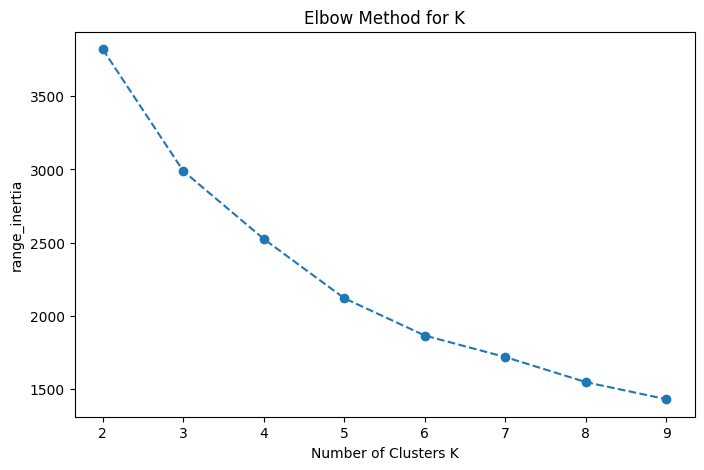

In [ ]:
# Elbow Method
range_inertia=[]
range_k = range(2, 10)
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(attributes)
    range_inertia.append(kmeans.inertia_)

# Plotting for Elbow Method to find K
plt.figure(figsize=(8, 5))
plt.plot(range_k, range_inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters K")
plt.ylabel("range_inertia")
plt.title("Elbow Method for K")
plt.show()




Visualization of Kmeans with K selected from Elbow Method


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-09-20  172.500000  173.050003  170.699997  172.169998  172.169998   
2017-09-21  171.690002  172.270004  170.009995  171.110001  171.110001   
2017-09-22  170.210007  171.729996  169.220001  170.539993  170.539993   
2017-09-25  169.240005  169.300003  161.559998  162.869995  162.869995   
2017-09-26  164.500000  165.500000  162.779999  164.210007  164.210007   

              Volume  Daily Change Per  Moving Average  Volatility  Cluster  
Date                                                                         
2017-09-20  12264100         -0.002029      172.098001    1.166447        2  
2017-09-21  11161400         -0.006157      171.888001    1.132548        2  
2017-09-22  12097100         -0.003331      171.847000    1.176834        2  
2017-09-25  41251600         -0.044975      170.783000    2.962067        2  
2017-09-26  2

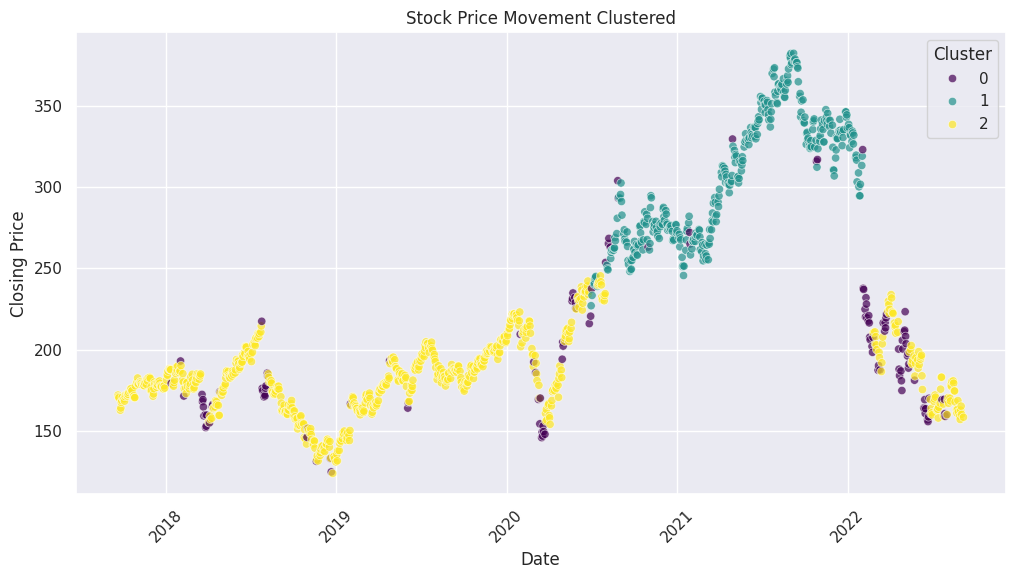

         Daily Change Per  Volatility        Volume
Cluster                                            
0               -0.007191   12.371381  5.141238e+07
1                0.000844    7.129443  1.895080e+07
2                0.001245    4.112486  1.936171e+07


In [ ]:
# KMeans with K selected from Elbow Method
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
# New Column
df["Cluster"] = kmeans.fit_predict(attributes)

print(df.head())

# Clusters visualization
days = df.index
df_clustered = df.copy()
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x=days, y=df["Close"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.title("Stock Price Movement Clustered")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend(title="Cluster")
plt.xticks(rotation=45)
plt.show()

print(df.groupby("Cluster")[["Daily Change Per", "Volatility", "Volume"]].mean())



Analysis:

*   Cluster 0- High Volatility and High Trading, days with Losses
*   Cluster 1- Small movement and moderate activity with Stable days
*   Cluster 2- Stable Gain days and Low Volatility



In [ ]:
print(df["Cluster"].value_counts())

Cluster
2    745
1    376
0    128
Name: count, dtype: int64


Analysis:
Market Trends- Days with high volatility days are rare compared to the stable trading days.


Visualization with different K


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-09-20  172.500000  173.050003  170.699997  172.169998  172.169998   
2017-09-21  171.690002  172.270004  170.009995  171.110001  171.110001   
2017-09-22  170.210007  171.729996  169.220001  170.539993  170.539993   
2017-09-25  169.240005  169.300003  161.559998  162.869995  162.869995   
2017-09-26  164.500000  165.500000  162.779999  164.210007  164.210007   

              Volume  Daily Change Per  Moving Average  Volatility  Cluster  
Date                                                                         
2017-09-20  12264100         -0.002029      172.098001    1.166447        0  
2017-09-21  11161400         -0.006157      171.888001    1.132548        0  
2017-09-22  12097100         -0.003331      171.847000    1.176834        0  
2017-09-25  41251600         -0.044975      170.783000    2.962067        0  
2017-09-26  2

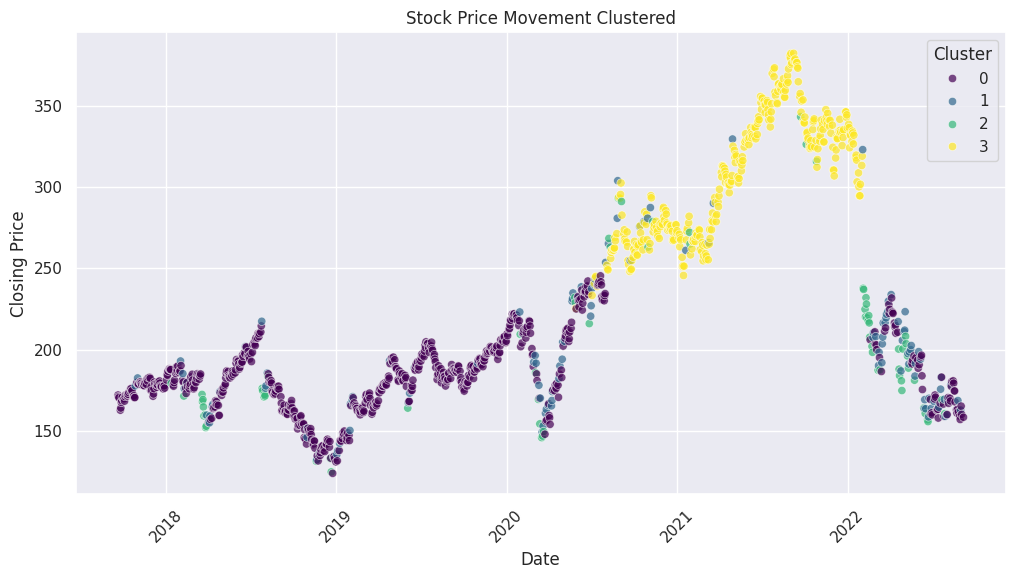

         Daily Change Per  Volatility        Volume
Cluster                                            
0               -0.001829    3.943567  1.854740e+07
1                0.036501    8.119069  3.695535e+07
2               -0.041643   14.106464  5.522156e+07
3                0.000066    7.077515  1.846022e+07


In [ ]:
# Kmeans with different k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# New Column
df["Cluster"] = kmeans.fit_predict(attributes)

print(df.head())

# Clusters visualization
days = df.index
df_clustered = df.copy()
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x=days, y=df["Close"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.title("Stock Price Movement Clustered")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend(title="Cluster")
plt.xticks(rotation=45)
plt.show()

print(df.groupby("Cluster")[["Daily Change Per", "Volatility", "Volume"]].mean())
